In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file

In [ ]:
df.index.max()

5282

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
df.loc[df['nome_area'] == input('Inserisci in nome di una regione: ')]['numero_dosi'].count()

Inserisci in nome di una regione: Lombardia


264

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente


In [ ]:
df.loc[df['nome_area'] == input('Inserisci in nome di una regione: ')] ['numero_dosi'].sum()

Inserisci in nome di una regione: Lombardia


17274689

5. visualizzare il numero di vaccini per ogni fornitore


In [ ]:
df.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'})

,fornitore,numero_dosi
0,Janssen,1846104
1,Moderna,15235940
2,Pfizer/BioNTech,71327408
3,Vaxzevria (AstraZeneca),11544591


6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini


In [ ]:
df2= df[df['nome_area'] == input('Inserisci in nome di una regione: ').title()]
df2 = df2.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
df2

7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre


array([12089444,  2685369,  2190389,   309487])

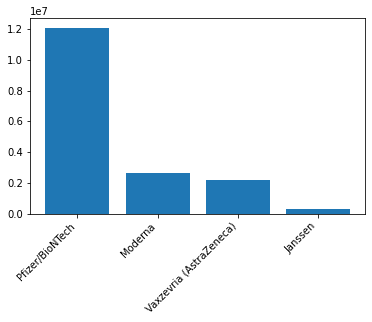

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.bar(df2['fornitore'], df2['numero_dosi'].values)
fig.autofmt_xdate(rotation=45)
df2['numero_dosi'].values

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta


array([12089444,  2685369,  2190389,   309487])

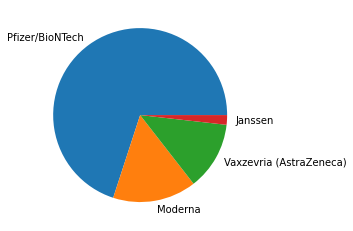

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df2['numero_dosi'].values, labels=df2['fornitore'])
df2['numero_dosi'].values

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap


10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini


In [ ]:
df3 = df.groupby('nome_area', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
df3.head(3)

,nome_area,numero_dosi
8,Lombardia,17274689
6,Lazio,10332809
3,Campania,9179718


11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media


In [ ]:
df3[df3['numero_dosi'] < df3['numero_dosi'].mean()]

,nome_area,numero_dosi
2,Calabria,2902284
15,Sardegna,2751776
7,Liguria,2547002
9,Marche,2507456
0,Abruzzo,2267252
5,Friuli-Venezia Giulia,2031903
18,Umbria,1469397
1,Basilicata,936665
13,Provincia Autonoma Trento,878910
12,Provincia Autonoma Bolzano / Bozen,793879
